In [45]:
import pandas as pd

# CSV dosyasını oku
df = pd.read_csv("multiTimeline (2).csv",skiprows=1)

df.columns = df.columns.str.strip()
df = df.rename(columns={"Depresyon: (Türkiye)": "Depresyon","Hafta":"Tarih"})
# Verinin ilk birkaç satırına bak
print(df.head())


        Tarih  Depresyon
0  2020-05-31         68
1  2020-06-07         71
2  2020-06-14         65
3  2020-06-21         69
4  2020-06-28         66


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tarih      258 non-null    object
 1   Depresyon  258 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.2+ KB


In [47]:
df['Tarih'] = pd.to_datetime(df['Tarih'])
df.set_index('Tarih', inplace=True)

# Veriyi kontrol edelim
print(df.head())

            Depresyon
Tarih                
2020-05-31         68
2020-06-07         71
2020-06-14         65
2020-06-21         69
2020-06-28         66


In [36]:
print(df.columns)
print(df.head())

Index(['Hafta', 'Depresyon: (Türkiye)'], dtype='object')
        Hafta  Depresyon: (Türkiye)
0  2020-05-31                    68
1  2020-06-07                    71
2  2020-06-14                    65
3  2020-06-21                    69
4  2020-06-28                    66


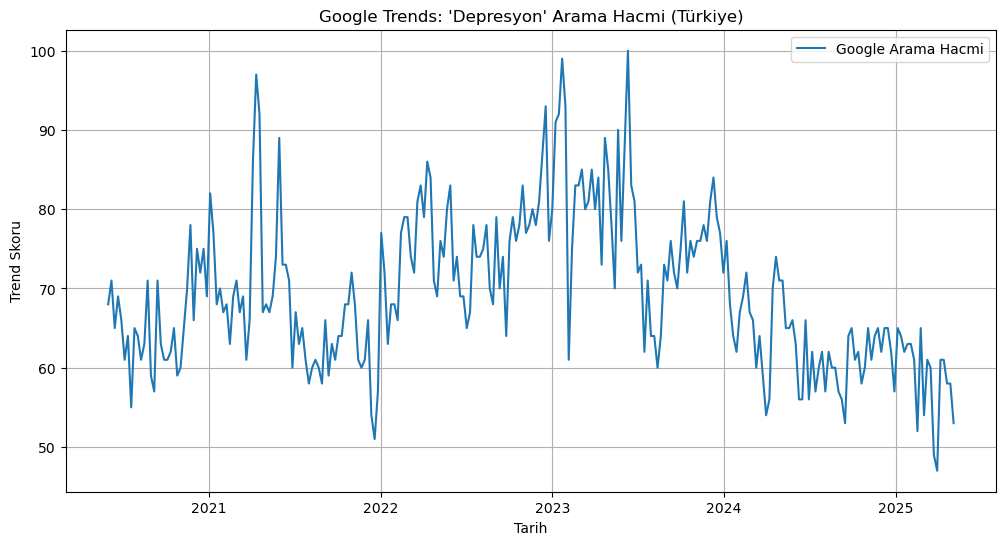

In [48]:
import matplotlib.pyplot as plt

# Zaman serisini çizdirelim
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Depresyon'], label="Google Arama Hacmi")
plt.title("Google Trends: 'Depresyon' Arama Hacmi (Türkiye)")
plt.xlabel("Tarih")
plt.ylabel("Trend Skoru")
plt.grid(True)
plt.legend()
plt.show()


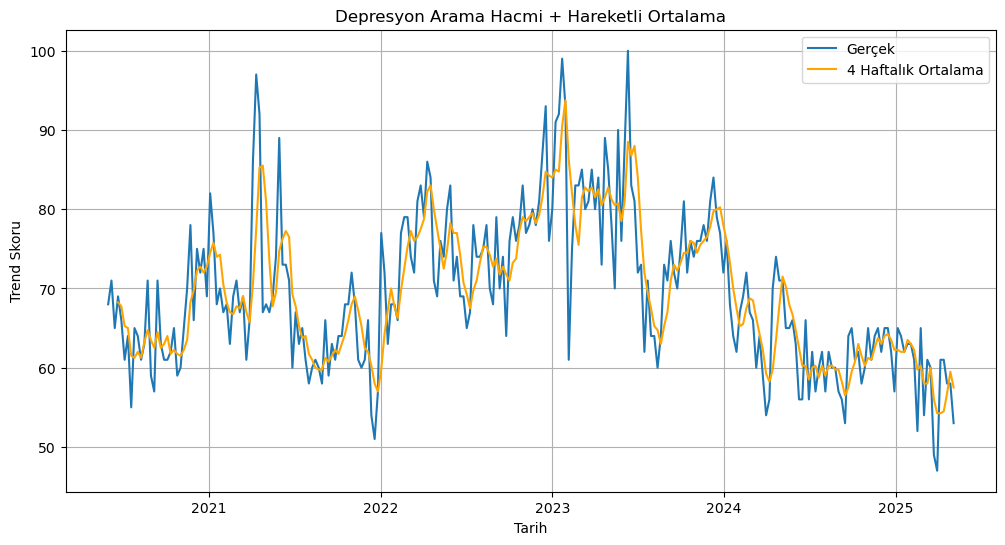

In [49]:
# 4 haftalık hareketli ortalama hesaplayalım
df['4 Haftalık Ortalama'] = df['Depresyon'].rolling(window=4).mean()

# Hem gerçek veriyi hem de hareketli ortalamayı çizdirelim
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Depresyon'], label="Gerçek")
plt.plot(df.index, df['4 Haftalık Ortalama'], label="4 Haftalık Ortalama", color="orange")
plt.title("Depresyon Arama Hacmi + Hareketli Ortalama")
plt.xlabel("Tarih")
plt.ylabel("Trend Skoru")
plt.legend()
plt.grid(True)
plt.show()


In [50]:
# En yüksek 10 arama hacmi gününü bulalım
print(df.sort_values(by="Depresyon", ascending=False).head(10))

            Depresyon  4 Haftalık Ortalama
Tarih                                     
2023-06-11        100                88.50
2023-01-22         99                90.50
2021-04-11         97                77.50
2022-12-18         93                84.75
2023-01-29         93                93.75
2021-04-18         92                85.25
2023-01-15         92                84.75
2023-01-08         91                85.00
2023-05-21         90                80.75
2021-05-30         89                74.75


In [54]:
from prophet import Prophet


# Veriyi Prophet için uygun formata getirelim
df_prophet = df.reset_index()[['Tarih', 'Depresyon']]  # 'Tarih' -> 'ds', 'Depresyon' -> 'y'
df_prophet.columns = ['ds', 'y']

# Prophet modelini kuruyoruz
model = Prophet()

# Veriyi modele fit edelim
model.fit(df_prophet)


17:22:24 - cmdstanpy - INFO - Chain [1] start processing
17:22:25 - cmdstanpy - INFO - Chain [1] done processing


In [56]:
# Gelecekteki 12 hafta için tahmin yapacağız
future = model.make_future_dataframe(periods=12, freq='W')  # 'W' haftalık periyot

# Tahminleri yapalım
forecast = model.predict(future)

# Tahminin ilk 5 satırını görelim
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


            ds       yhat  yhat_lower  yhat_upper
265 2025-06-29  48.735599   40.097751   56.317940
266 2025-07-06  47.495216   39.588076   55.903524
267 2025-07-13  46.963018   38.542049   55.101799
268 2025-07-20  46.614124   38.161194   54.035208
269 2025-07-27  46.198070   38.000088   54.624517


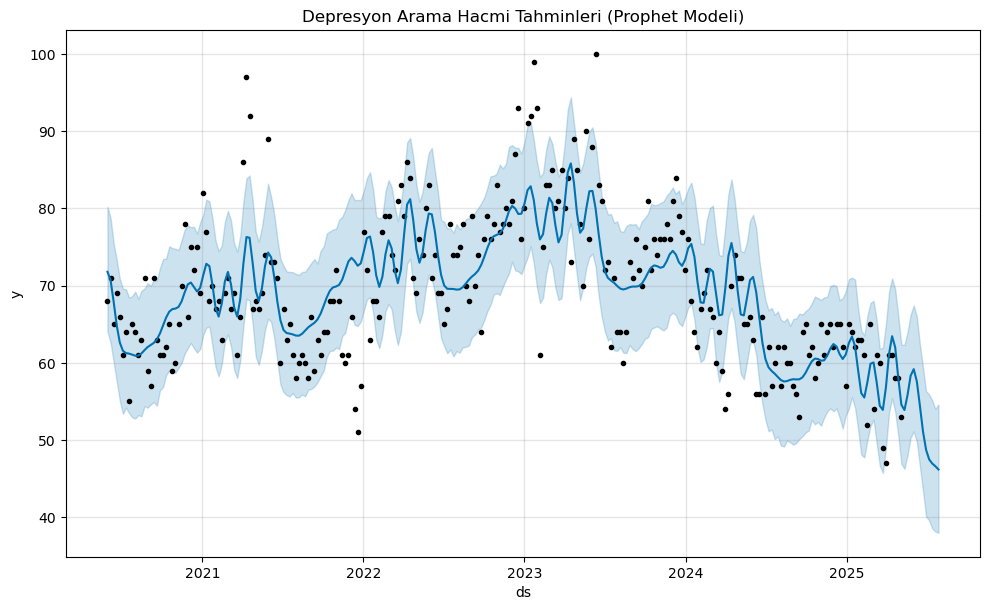

In [57]:
# Sonuçları görselleştirelim
model.plot(forecast)
plt.title("Depresyon Arama Hacmi Tahminleri (Prophet Modeli)")
plt.show()


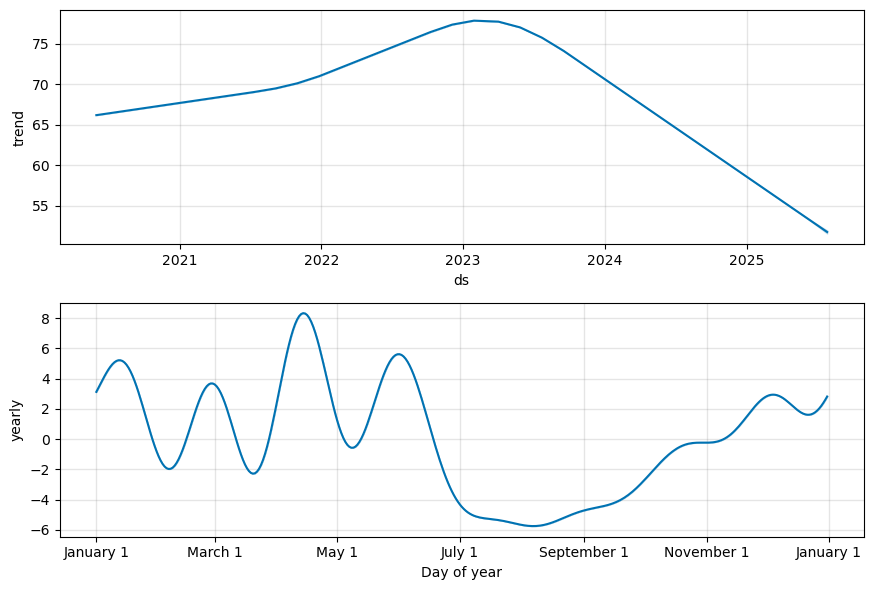

In [58]:
# Sezonluk etkiler ve trendi gösterelim
model.plot_components(forecast)
plt.show()


17:24:34 - cmdstanpy - INFO - Chain [1] start processing
17:24:34 - cmdstanpy - INFO - Chain [1] done processing


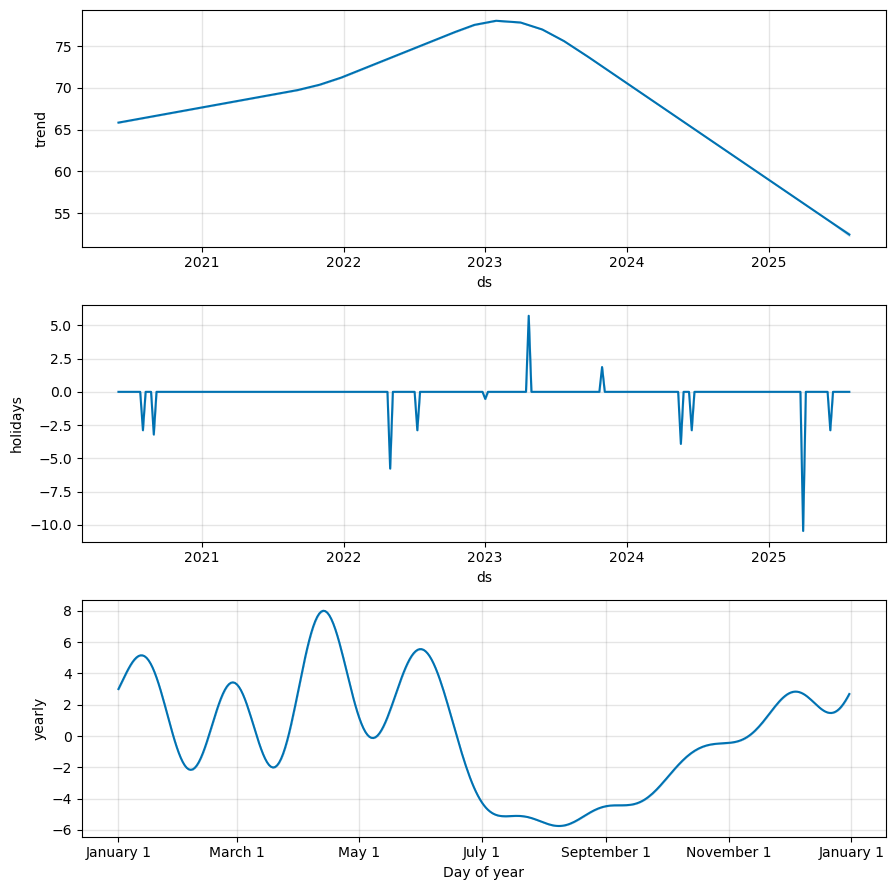

In [59]:
from prophet import Prophet

# Model tanımı + Türkiye tatilleri
model = Prophet()
model.add_country_holidays(country_name='Turkey')  # ✅ Türkiye tatilleri eklendi

# Modeli yeniden eğit
model.fit(df_prophet)

# Gelecekteki verileri üret (örnek: 12 hafta)
future = model.make_future_dataframe(periods=12, freq='W')

# Tahmin
forecast = model.predict(future)

# Tahminin bileşenlerini göster (artık tatil etkisi de var)
model.plot_components(forecast)
plt.show()


In [60]:
from prophet import Prophet
import pandas as pd

# Türkiye için örnek tatil listesi (genişletebilirsin)
holidays = pd.DataFrame({
    'holiday': 'resmi_tatil',
    'ds': pd.to_datetime([
        '2020-01-01', '2020-04-23', '2020-05-19', '2020-07-15', '2020-10-29',
        '2021-01-01', '2021-04-23', '2021-05-19', '2021-07-15', '2021-10-29',
        '2022-01-01', '2022-04-23', '2022-05-19', '2022-07-15', '2022-10-29',
        '2023-01-01', '2023-04-23', '2023-05-19', '2023-07-15', '2023-10-29',
        '2024-01-01', '2024-04-23', '2024-05-19', '2024-07-15', '2024-10-29'
    ]),
    'lower_window': 0,
    'upper_window': 1
})


In [61]:
model = Prophet(holidays=holidays)
model.fit(df_prophet)  

17:28:42 - cmdstanpy - INFO - Chain [1] start processing
17:28:42 - cmdstanpy - INFO - Chain [1] done processing


In [65]:
future = model.make_future_dataframe(periods=12, freq='W')
forecast = model.predict(future)

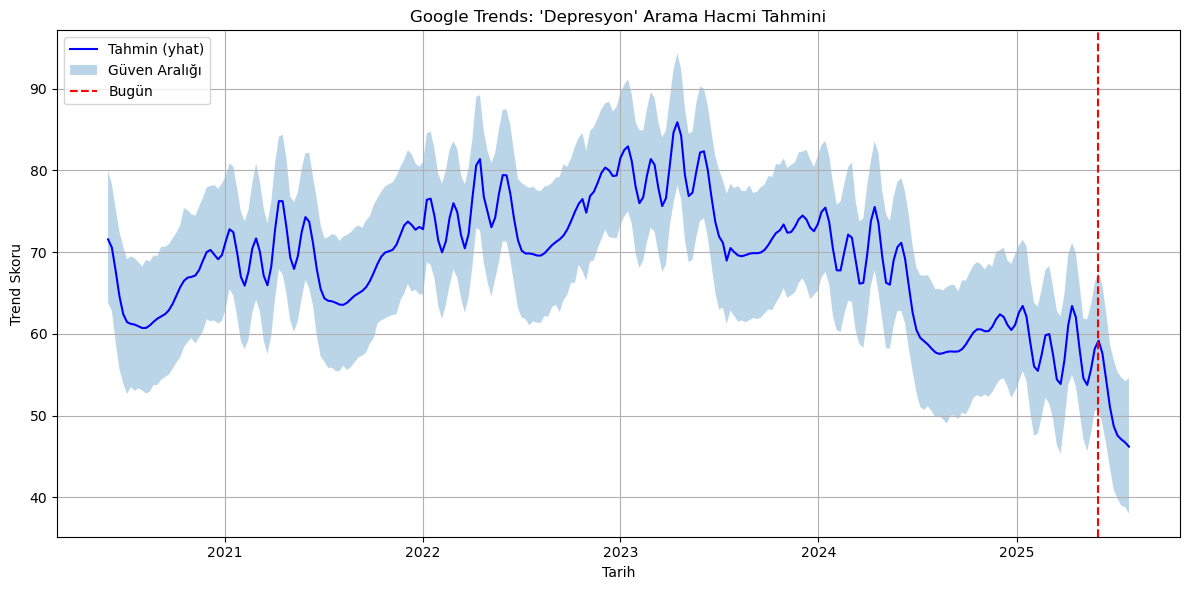

In [63]:
import matplotlib.pyplot as plt

# Sadece gelecekteki tarihleri filtrele (2025 Mayıs sonrasını alalım)
future_forecast = forecast[forecast['ds'] > '2025-05-31']

plt.figure(figsize=(12, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Tahmin (yhat)', color='blue')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], 
                 alpha=0.3, label='Güven Aralığı')
plt.axvline(x=pd.to_datetime('2025-05-31'), color='red', linestyle='--', label='Bugün')
plt.title("Google Trends: 'Depresyon' Arama Hacmi Tahmini")
plt.xlabel("Tarih")
plt.ylabel("Trend Skoru")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\kerem\AppData\Local\Temp\ipykernel_7984\1754617264.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_2025['Ay'] = forecast_2025['ds'].dt.to_period('M')


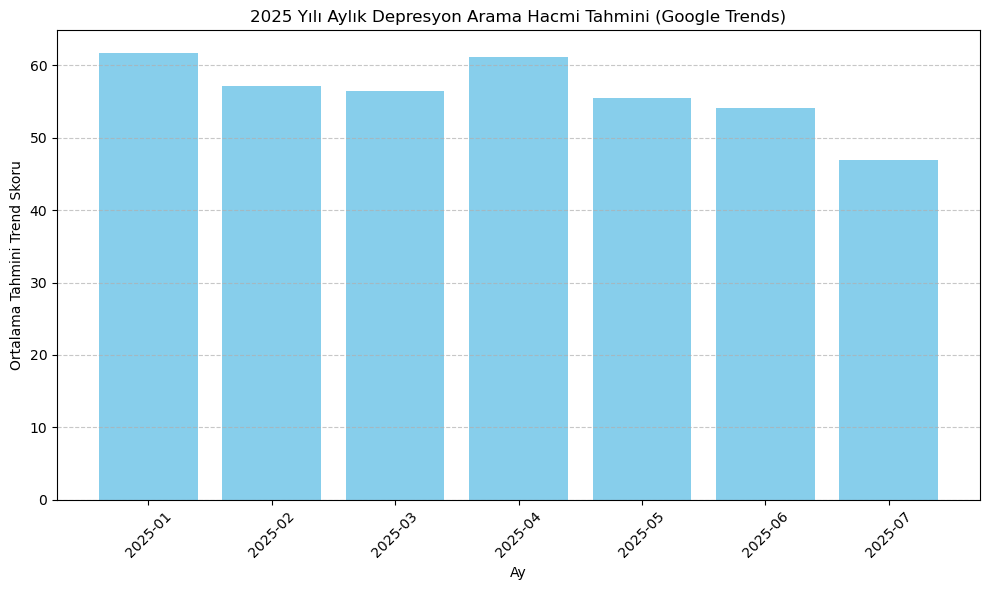

In [69]:
# 2025 yılı verisini al
forecast_2025 = forecast[(forecast['ds'] >= '2025-01-01') & (forecast['ds'] <= '2025-12-31')]

# Ay bilgisi ekle (tarihleri periyot olarak gruplamak için)
forecast_2025['Ay'] = forecast_2025['ds'].dt.to_period('M')

# Aylık ortalama tahminleri hesapla
monthly_avg = forecast_2025.groupby('Ay')['yhat'].mean().reset_index()
monthly_avg['Ay'] = monthly_avg['Ay'].astype(str)

# Grafik çiz
plt.figure(figsize=(10, 6))
plt.bar(monthly_avg['Ay'], monthly_avg['yhat'], color='skyblue')
plt.title("2025 Yılı Aylık Depresyon Arama Hacmi Tahmini (Google Trends)")
plt.xlabel("Ay")
plt.ylabel("Ortalama Tahmini Trend Skoru")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
